In [1]:
import numpy
from matplotlib import pyplot
import scipy.special
%matplotlib inline

In [2]:
a = numpy.zeros([3,2])
a[0,0] =9
a[0,1] = 3
a[1,1] = 4
a[2,1] = 5
print(a)

[[9. 3.]
 [0. 4.]
 [0. 5.]]


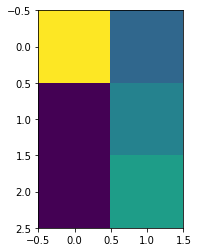

In [3]:
pyplot.imshow(a,interpolation='nearest')

In [4]:
class neuralNetwork:
    def __init__(self,inputNode,hiddenNode,outputNode,learningRate):
        self.iNode = inputNode
        self.hNode = hiddenNode
        self.oNode = outputNode
        self.lr = learningRate
        
        #numpy.random.normal(loc,scale,size) 
        #loc:center of distribution
        #scale:standard deviation of distribution

        self.wih = numpy.random.normal(0.0,pow(self.hNode,-0.5),(self.hNode,self.iNode)) #weight between input and hidden node
        self.who = numpy.random.normal(0.0,pow(self.oNode,-0.5),(self.oNode,self.hNode)) #weight between hidden and output node
        
        
        self.activation_function = lambda x:scipy.special.expit(x) #this is the sigmoid function
        
    def train(self,input_list,target_list):
        
        #convert input and target list into 2d array
        inputs = numpy.array(input_list,ndmin=2).T
        target = numpy.array(target_list,ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        #calculate signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        #calculate signal emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #error is (target-actual)
        output_errors = target - final_outputs
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        #update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        #update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        
    def query(self,input_list):
        inputs = numpy.array(input_list,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [5]:
inputNode=784   #num pixels in the picture
hiddenNode= 300
outputNode=10
learningRate=0.1
n= neuralNetwork(inputNode,hiddenNode,outputNode,learningRate)

In [6]:
training_data_file = open('mnist_dataset/mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()
print(len(training_data_list))


60000


In [7]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')

        #scale the numbers to fall in range 0.01-1
        scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01

        targets = numpy.zeros(outputNode) +0.01
        targets [int(all_values[0])] = 0.99

        n.train(scaled_input,targets)

In [8]:
test_data_file = open('mnist_dataset/mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()
print(len(test_data_list))

10000


In [9]:
all_values = test_data_list[0].split(',')
print(all_values[0])


7


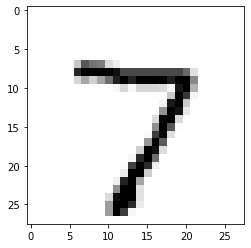

In [10]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [11]:
scoreboard = []

for record in test_data_list:
    
    all_values = record.split(',')
    
    #get the correct answer
    correct_label = int(all_values[0])
    
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    
    #query the network
    outputs = n.query(inputs)
    
    #get the index of the highest value in the output
    label = numpy.argmax(outputs)
    #print(label,correct_label)
    if (label == correct_label):
        #print('correct')
        scoreboard.append(1)
    else:
        #print('hi')
        scoreboard.append(0)
        
scorecard_array = numpy.asarray(scoreboard)
print('performance = ',scorecard_array.sum()/scorecard_array.size)

performance =  0.9748


In [12]:
from notebook.auth import passwd

In [13]:
passwd()


Enter password: ········
Verify password: ········


'sha1:256edf29b7c0:65dbe2c7b17dc05ac7173c979db4e65fc4afd027'